In [5]:
# %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data,encoding ="ISO-8859-1")
ride_data_df = pd.read_csv(ride_data,encoding ="ISO-8859-1")

# Combine the data into a single dataset
merged_data = pd.merge(ride_data_df,city_data_df,on="city",how="left")

# Display the data table for preview
merged_data.head()

,city,driver_count,type
61,Amandaburgh,12,Urban
9,Barajasview,26,Urban
90,Barronchester,11,Suburban
88,Bethanyland,22,Suburban
115,Bradshawfurt,7,Rural
91,Brandonfort,10,Suburban
18,Carriemouth,52,Urban
50,Christopherfurt,41,Urban
69,Colemanland,23,Suburban
97,Davidfurt,23,Suburban


## Bubble Plot of Ride Sharing Data

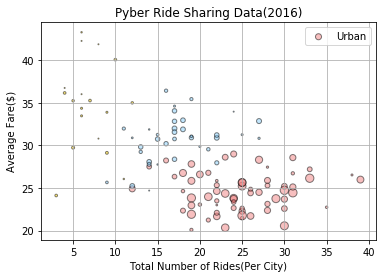

In [88]:
# Obtain the x and y coordinates for each of the three city types
#find total number of rides per city 
x = merged_data.groupby("city")["ride_id"].count()
x_df = pd.DataFrame(x)
#find average fares per city
y =merged_data.groupby("city")["fare"].mean()
y_df =pd.DataFrame(y)
#create a dataframe that holds x,y, driver_count and city type data point 

xy_merged_data=pd.merge(x_df,y_df, on="city",how="left")
xy_city_merged_data = pd.merge(xy_merged_data,city_data_df,on="city",how="left")


#assign color to each city type by create a list of colors
color=[]
for t in xy_city_merged_data["type"]:
    if t == "Urban":
        color.append("lightcoral")
    elif t =="Suburban":
        color.append("lightskyblue")
    else:
        color.append("gold")

# Build the scatter plots for each city types
number_rides =xy_city_merged_data["ride_id"]
average_fare =xy_city_merged_data["fare"]
driver_count =xy_city_merged_data["driver_count"]
pie =plt.scatter(number_rides,average_fare,s=driver_count,c=color,edgecolor="black",alpha=0.5,linewidth = 1)

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data(2016)")
plt.grid()

#Create a legend
legend_type =["Urban","Suburban","Rural"]
plt.legend(("Urban","Suburban","Rural"),loc="best")

# Incorporate a text label regarding circle size


# Save Figure
plt.savefig("pyberridesharingdata2016.png")

In [90]:
# Show plot
plt.show()

## Total Fares by City Type

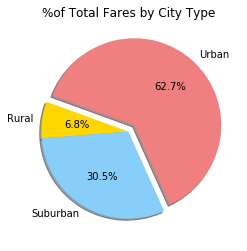

In [190]:
# Calculate Type Percents
#group fare by city type and sum up the total fares of each city type
total_fare_by_type = merged_data.groupby("type")["fare"].sum()
#sum up the total fares across all cities
total_fare = merged_data["fare"].sum()
#find the percent of total fares of each city type by dividing total fares per city by total fares across all cities
percent_fare_by_type = total_fare_by_type/total_fare

#Build Pie Chart
explode = (0, 0, 0.1)
labels=["Rural","Suburban","Urban"]
colors=["gold","lightskyblue","lightcoral"]
plt.pie(percent_fare_by_type,explode=explode,labels=labels,colors=colors , autopct ="%1.1f%%",shadow =True,startangle=160,)
plt.title("%of Total Fares by City Type")
# Save Figure
plt.savefig("totalfarebycitytypepie.png")
# Show Figure
plt.show()

## Total Rides by City Type

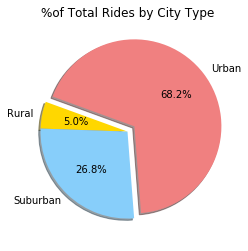

In [91]:
# Calculate Ride Percents
total_rides_by_type = merged_data.groupby("type")["ride_id"].sum()
total_rides = merged_data["ride_id"].sum()
percent_rides_by_type = total_rides_by_type/total_rides

#Build Pie Chart
explode = (0, 0, 0.1)
labels=["Rural","Suburban","Urban"]
colors=["gold","lightskyblue","lightcoral"]
plt.pie(percent_rides_by_type,explode=explode,labels=labels,colors=colors , autopct ="%1.1f%%",shadow =True,startangle=160,)
plt.title("%of Total Rides by City Type")
# Save Figure
plt.savefig("totalridesbycitytypepie.png")
# Show Figure
plt.show()


## Total Drivers by City Type

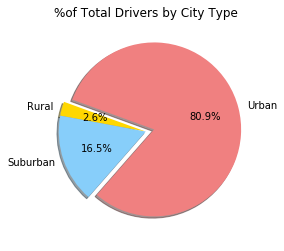

In [92]:
# Calculate Driver Percents
total_drivers_by_type = city_data_df.groupby("type")["driver_count"].sum()
total_drivers = city_data_df["driver_count"].sum()
percent_drivers_by_type = total_drivers_by_type/total_drivers

#Build Pie Chart
explode = (0, 0, 0.1)
labels=["Rural","Suburban","Urban"]
colors=["gold","lightskyblue","lightcoral"]
plt.pie(percent_drivers_by_type,explode=explode,labels=labels,colors=colors , autopct ="%1.1f%%",shadow =True,startangle=160,)
plt.title("%of Total Drivers by City Type")
# Save Figure
plt.savefig("totaldriversbycitytypepie.png")
# Show Figure
plt.show()

Conclusions: 
1. The average fare in urban area is significantly lower than that in other city types, conversely, the total number of rides in urban is nearly double than that in rural area
2. the total number of driver in urban is higher which can be one of the factor that leads to total number of rides in urban is high
3. more than 80% of uber driver is in urban area 
4. There is overlap between suburban and urban in number of total rides 15-25. This can be a potential revenue increase opportunity. Suburan has 3 times less drivers, but the average fares are nearly twice higher in suburban than that in urban areas. if through promotion to encourage more people become drivers, total fare will increase in suburban area, thus total revenue will increase.
